# Part I - Ford GoBike System Data
## by Sharath V

## Introduction

Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# load dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Visual check of the first few rows in the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Check the no. of rows & columns in the dataset
print('The dataset has rows, columns: {}'.format(df.shape))

The dataset has rows, columns: (183412, 16)


In [5]:
# Explore the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# check the summary statistics of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The minimum value of member_birth_year is 1878, which seems unrealistic considering the fact that an 150+ old person is using the bike sharing platform. In the following cleaning steps, we delete the records which are below the year 1918 to eliminate unrealistic ages of above 100 as of 2008. 

## Data Cleaning

In [7]:
# Check for duplicate rows 
df.duplicated().sum()

0

There are no duplicate rows

In [8]:
# Check for rows with null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We cannot fill the null values with average values for either the start & end_station_id or for member_birth_year & member_gender. Hence we drop these rows.

In [9]:
# Drop the rows with null values
df.dropna(axis = 0, inplace = True)

In [10]:
# Check if the null values are dropped
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# Recheck the no. of rows and columns after null values are dropped
df.shape

(174952, 16)

In [12]:
# Convert data type of member_birth_year to int
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [14]:
# Drop rows which have member birth year < 1918
df = df.drop(df[df.member_birth_year < 1918].index)

In [15]:
df.shape

(174880, 16)

In [16]:
#Change data type of start_time and end_time to date-time
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [17]:
# Create a new column named 'age' by subtracting the member_birth_year from 2008, make it an integer data type
df['age'] = 2018 - df.member_birth_year
df['age'] = df['age'].astype(int)

In [18]:
# Create a column to show the ride duration in minutes, round down the number to a whole number
df['duration_min'] = df.duration_sec // 60 

In [19]:
# Create a column to show the hour and day of the ride
df = df.assign(hour=pd.to_datetime(df['start_time']).dt.strftime("%H"), day =pd.to_datetime(df['start_time']).dt.date)
df['hour'] = df['hour'].astype(int)

In [20]:
# Create a column to show the day of the ride
df['day_of_week'] = df['start_time'].dt.day_name()

<B> Classify the days as weekday and weekend </B>

weekday: (Monday, Tuesday, Wednesday, Thursday, Friday)<br>
weekend: (Saturday, Sunday)


In [21]:
# Define a list of weekdays and weekends
weekday = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday')
weekend = ('Saturday', 'Sunday')

# Check to which list the 'day_of_week' falls into

def day_type(day):
    if day in weekday:
        type_of_day = 'weekday'
        
    else: 
        type_of_day = 'weekend'
    
    return type_of_day

df['type_of_day'] = df['day_of_week'].apply(day_type)

In [22]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,hour,day,day_of_week,type_of_day
152535,636,2019-02-06 15:29:13.832,2019-02-06 15:39:50.171,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5.0,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,1994,Male,No,24,10,15,2019-02-06,Wednesday,weekday
21657,1508,2019-02-26 08:44:17.779,2019-02-26 09:09:26.637,134.0,Valencia St at 24th St,37.752428,-122.420628,6.0,The Embarcadero at Sansome St,37.804770,...,Subscriber,1987,Male,No,31,25,8,2019-02-26,Tuesday,weekday
39427,545,2019-02-23 09:05:59.125,2019-02-23 09:15:04.897,10.0,Washington St at Kearny St,37.795393,-122.404770,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1961,Male,No,57,9,9,2019-02-23,Saturday,weekend
24184,822,2019-02-25 18:34:10.061,2019-02-25 18:47:52.312,26.0,1st St at Folsom St,37.787290,-122.394380,104.0,4th St at 16th St,37.767045,...,Subscriber,1989,Male,No,29,13,18,2019-02-25,Monday,weekday
20110,121,2019-02-26 14:09:05.871,2019-02-26 14:11:07.365,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,244.0,Shattuck Ave at Hearst Ave,37.873676,...,Subscriber,1993,Male,No,25,2,14,2019-02-26,Tuesday,weekday


In [23]:
# Drop unwanted columns 
df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','duration_sec'], axis=1, inplace=True)

In [24]:
# Save the data frame to a csv file
df.to_csv('201902-fordgobike-tripdata_clean.csv')

In [25]:
df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,hour,day,day_of_week,type_of_day
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,34,869,17,2019-02-28,Thursday,weekday
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,46,1030,12,2019-02-28,Thursday,weekday
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,29,608,17,2019-02-28,Thursday,weekday
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,44,26,23,2019-02-28,Thursday,weekday
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,59,29,23,2019-02-28,Thursday,weekday


In [26]:
df.shape

(174880, 17)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 17 columns):
start_time                 174880 non-null datetime64[ns]
end_time                   174880 non-null datetime64[ns]
start_station_id           174880 non-null float64
start_station_name         174880 non-null object
end_station_id             174880 non-null float64
end_station_name           174880 non-null object
bike_id                    174880 non-null int64
user_type                  174880 non-null object
member_birth_year          174880 non-null int64
member_gender              174880 non-null object
bike_share_for_all_trip    174880 non-null object
age                        174880 non-null int64
duration_min               174880 non-null int64
hour                       174880 non-null int64
day                        174880 non-null object
day_of_week                174880 non-null object
type_of_day                174880 non-null object
dtypes: datetime64[ns](2),

### What is the structure of your dataset?

> The clean dataset has 174880 rows and 17 columns. 

### What is/are the main feature(s) of interest in your dataset?

> Ride distribution in terms of age group, gender, type of day (weekday/weekend), type of user (customer/subscriber), ride duration in weekday/weekend are the features of interest that will be explored in this dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age (based on member_birth_year), gender, duration_min, user_type, member_gender will be useful in supporting the features of interest. 

## Univariate Exploration



##### Question 1: What is the number of trips per each day and how is the split between weekdays and weekends? 

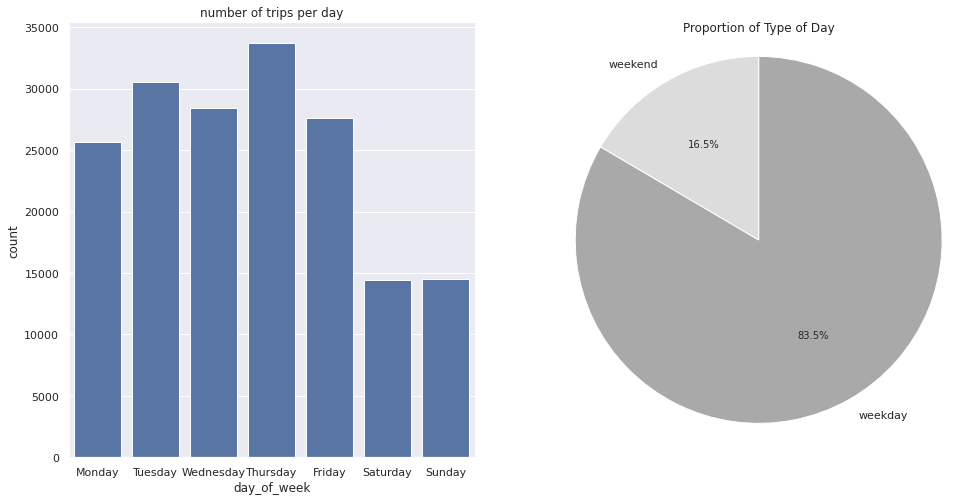

In [28]:
# Create 2 subplots, one for no. of trips per day and another one to show the composition of type of day
plt.figure(figsize =(16, 8))

days = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

# Subplot 1
plt.subplot(1,2,1)
base_color = sb.color_palette()[0] 
sb.countplot(data = df, x = 'day_of_week', color = base_color, order = days)
plt.title('number of trips per day');

# Subplot 2
plt.subplot(1,2,2)
type_of_day_counts = df['type_of_day'].value_counts()
colors = ['darkgrey','gainsboro']
plt_1 = plt.pie(type_of_day_counts, labels = type_of_day_counts.index, colors = colors, startangle=90, counterclock = False, autopct ='%.1f%%');
plt.axis('square');
plt.title ('Proportion of Type of Day'); 

##### Observations: 

<I> Thursday </I> appears to be the most popular for bike share. <I>Weekends</I> tend to have low bike rides indicating that working class might be the major user group. 

##### Question 2: When are the peak hours based on the no. of bike rides? 

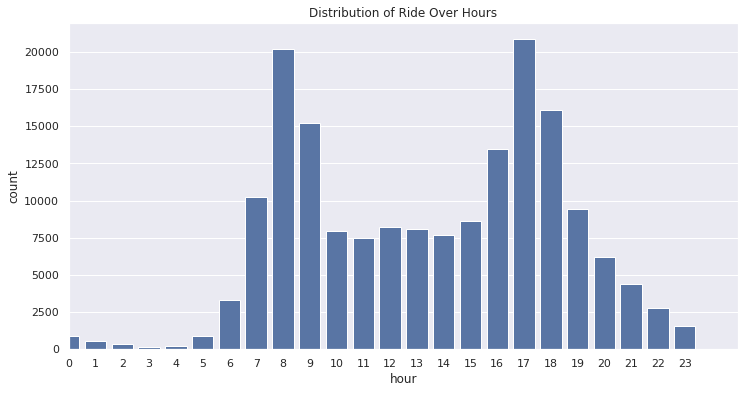

In [29]:
# Distribution of rides over hours
plt.figure(figsize=(12,6))
hour_bins = np.arange(0, df['hour'].max()+1, 1)

sb.countplot(data=df, x='hour', color = base_color)
plt.title('Distribution of Ride Over Hours')
plt.xlabel('hour')
plt.xlim((0,25));

##### Observations: 

7am - 9am and 4pm - 6 pm seem to be the peak hours based on no. of bike rides. 

##### Question 3: What is the proportion of subscribers and customers in the dataset? 

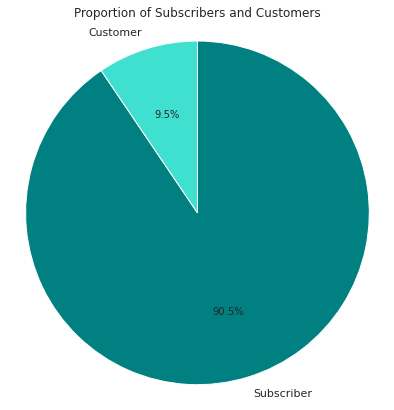

In [30]:
# Create a pie chart to show the proportion of subsribers and customers
user_counts = df['user_type'].value_counts()
colors = ['teal','turquoise']
plt_1 = plt.figure(figsize=(7,7));
plt_1 = plt.pie(user_counts, labels = user_counts.index, colors = colors, startangle=90, counterclock = False, autopct ='%.1f%%');
plt.axis('square');
plt.title ('Proportion of Subscribers and Customers'); 

##### Observations: 

90% of the users are 'subscribers' who form the major proportion of the users. 

##### Question 4: What is the gender composition of the users? 

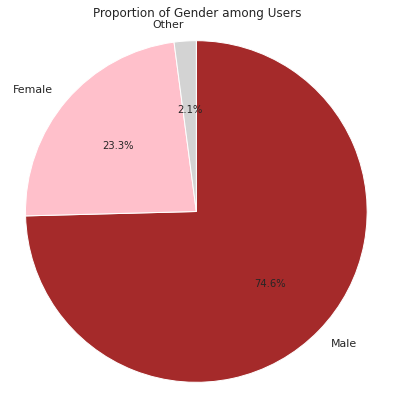

In [31]:
# Create a pie chart of member gender composition
gender_counts = df['member_gender'].value_counts()
colors = ['brown','pink','lightgrey']
plt_1 = plt.figure(figsize=(7,7));
plt_1 = plt.pie(gender_counts, labels = gender_counts.index, colors = colors, startangle=90, counterclock = False, autopct ='%.1f%%');
plt.axis('square');
plt.title ('Proportion of Gender among Users'); 

##### Observations: 
Around 75% of the users are males. 

##### Question 5: How is the age distributed among bike users? 

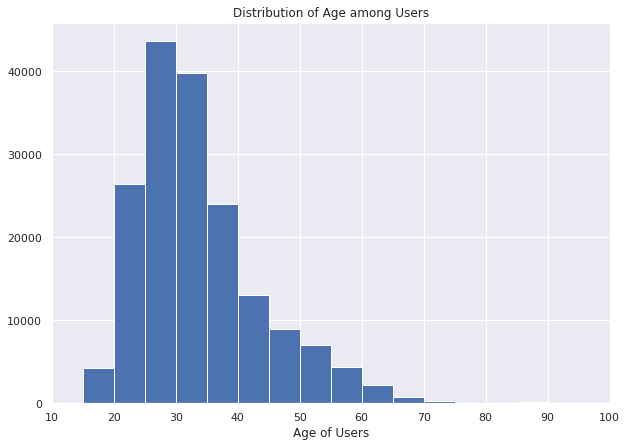

In [32]:
# Create a hist plot of User age

plt.figure(figsize=(10,7))
age_bins = np.arange(10, df['age'].max()+5, 5)

plt.hist(data=df, x='age', bins= age_bins)
plt.title('Distribution of Age among Users')
plt.xlabel('Age of Users')
plt.xlim((10,100));

##### Observations:

Age group between 25 and 35 contribute to the most bike rides.

##### Question 6: Which are the top 10 starting stations for bike ride? 

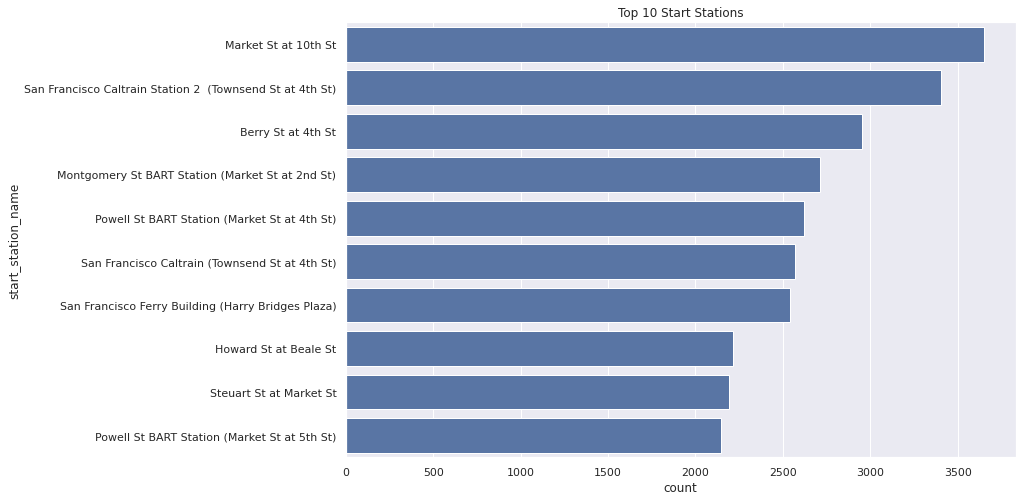

In [33]:
# Create a value count for top 10 starting stations
top_10_station = df['start_station_name'].value_counts().head(10).index
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]
sb.countplot(data =df, y='start_station_name', color = base_color, order = top_10_station) # y axis is used to make the names of the stations horizontal and readable
plt.title('Top 10 Start Stations');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of variables of interest is discussed at the end of each plot. I did not find any unusual points and hence no further transformation of data was necessary at this point. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were no unuual distribution in the features that I investigated. Before beginning the univariate exploration, data cleaning was carried out during which data type of 'start_time', 'end_time' was changed to date-time. This was necessary to create time-related columns that are the main features of interest. New columns named 'Age','Hour','Day','Type of Day' (weekday/weekend) were created for further analysis. 

## Bivariate Exploration


##### Distribution of Duration in minutes vs User Type

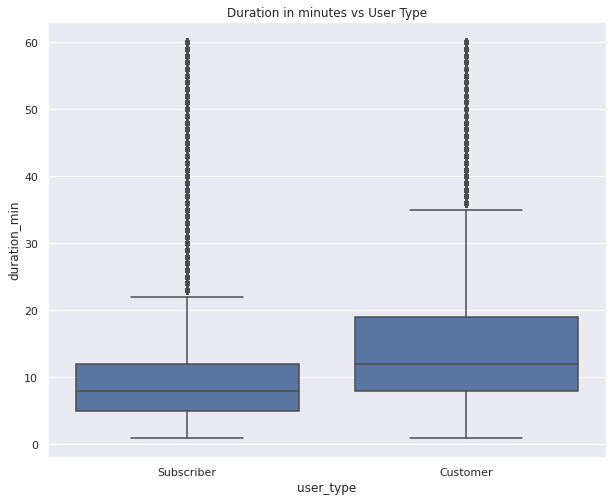

In [34]:
# Create a subset to store rides below 60 minutes
duration = df.query("duration_min <=60")
plt.figure(figsize=(10,8))
base_color = sb.color_palette ()[0]
sb.boxplot(data=duration, x = 'user_type', y='duration_min', color = base_color)
plt.title('Duration in minutes vs User Type');

##### Observations: 

The average duration in minutes seem to be higher for customer user type. Also the maximum and maximum duration ride is higher for customer user type compared with subscriber user type. 

##### Distribution of Duration in minutes vs User Gender


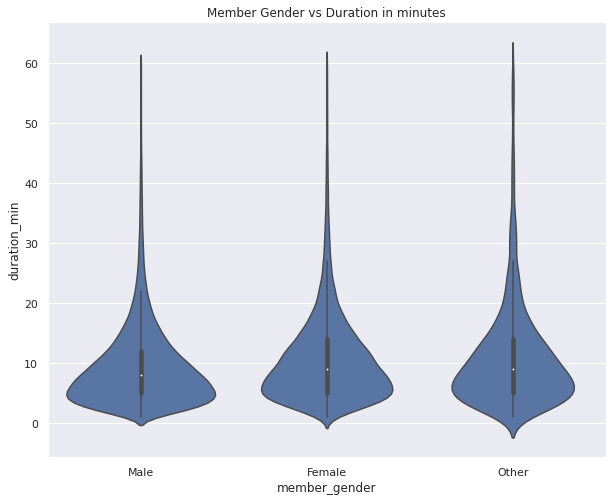

In [35]:
duration = df.query("duration_min <=60")
plt.figure(figsize=(10,8))
base_color = sb.color_palette ()[0]
sb.violinplot(data=duration, x = 'member_gender', y='duration_min', color = base_color)
plt.title('Member Gender vs Duration in minutes');

##### Observations: 

The average duration in minutes seem to almost the same across member genders. 

##### User Type vs User Gender

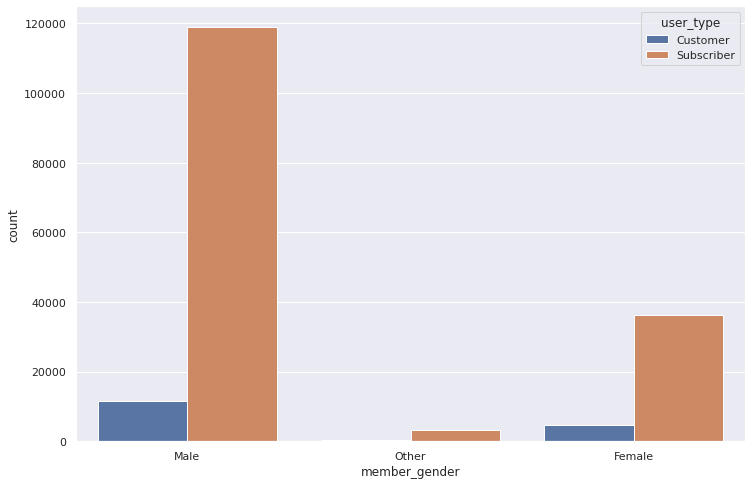

In [36]:
plt.figure(figsize=(12,8))
sb.countplot(x='member_gender', hue='user_type', data = df)
plt.show();

##### Observations:
The ratio of subscribers to customers seem to be a bit higher in females when compared to males.

##### No. of Rides vs User Type vs Member Gender

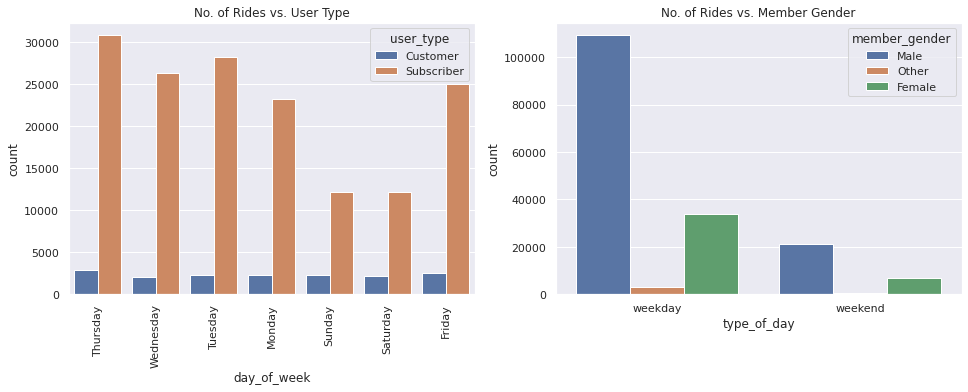

In [37]:
# Create two sub-plots
plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df , x='day_of_week', hue='user_type')
plt.title('No. of Rides vs. User Type')
plt.xticks(rotation=90)
    
plt.subplot(1, 2, 2)
sb.countplot(data=df , x='type_of_day', hue='member_gender')
plt.title('No. of Rides vs. Member Gender') ;

##### Observations:

1. The no. of rides by customers is almost steady across days of the week, whereas the no. of rides by subscribers tend to be lower in the weekends. 

2. The no. of rides drop significantly in the weekend for all genders. 

##### Age vs. Member Gender

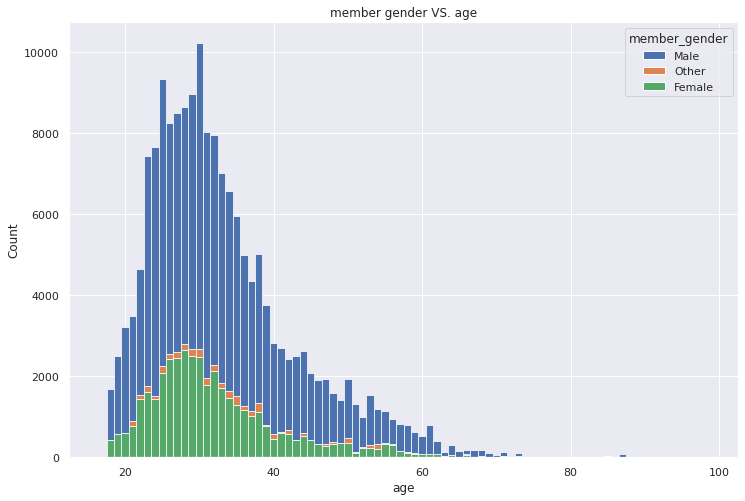

In [38]:
plt.figure(figsize = [12, 8])

sb.histplot(data=df, x='age', stat='count', discrete=True, hue='member_gender', multiple='stack', alpha = 1)
plt.title('member gender VS. age') ;

##### Observations:

The distribution of age is similar across member genders and appears to be skewed to the right. 

##### Duration in minutes vs. Age vs. Hour

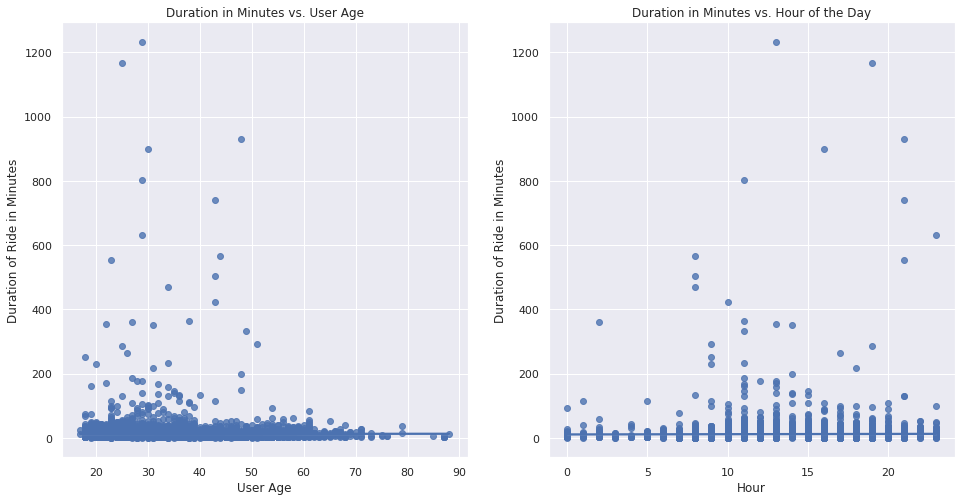

In [39]:
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 10000, replace = False)
df_subset = df.reindex(sample)

plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
sb.regplot(data= df_subset, x='age', y='duration_min', y_jitter=0.3);
plt.title('Duration in Minutes vs. User Age');
plt.xlabel('User Age')
plt.ylabel('Duration of Ride in Minutes');

plt.subplot(1,2,2)
sb.regplot(data=df_subset, x='hour', y='duration_min');
plt.title('Duration in Minutes vs. Hour of the Day');
plt.xlabel('Hour');
plt.ylabel('Duration of Ride in Minutes');

##### Observations:

Most long duration rides appear to be in the User Age 25-45. There appears to be no strong relationship between duration in min and user age. 

## Multivariate Exploration

##### User Age vs. Duration of Ride in minutes vs. Member Gender

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


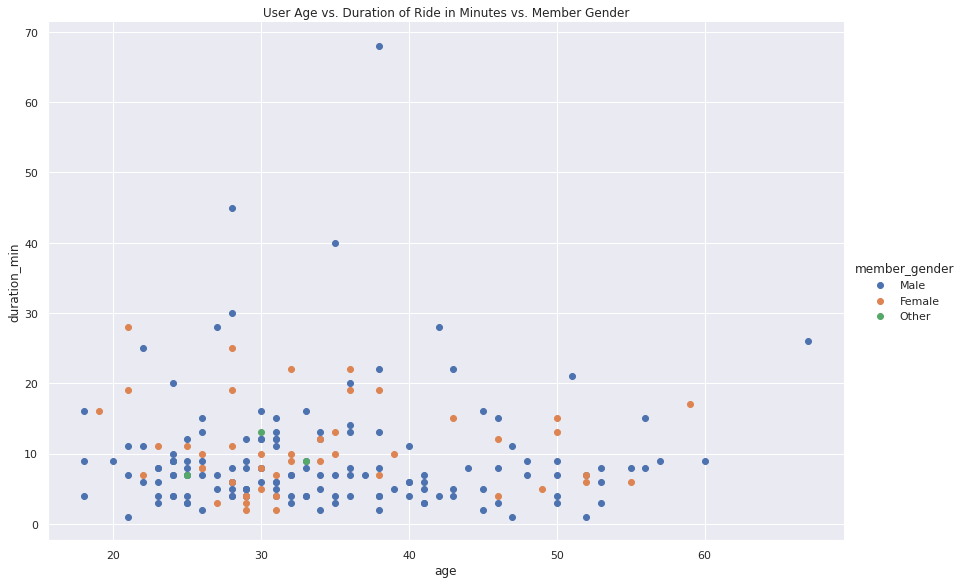

In [40]:
# Comparing User Age vs. Duration of Ride in minutes vs. Member Gender 
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.reindex(sample)

g = sb.FacetGrid(data =df_subset, hue='member_gender', hue_order=['Male','Female','Other'], size =8, aspect=1.5)
g.map(plt.scatter, 'age', 'duration_min')
g.add_legend()
plt.title('User Age vs. Duration of Ride in Minutes vs. Member Gender');

##### Observations:

1. Duration of ride (in minutes) is the highest in the age group 25-35 for all genders. 
2. Males in the age group 40-50 have more duration of ride compared to Females.

##### User Age vs. Member Gender vs. Hour of the Day

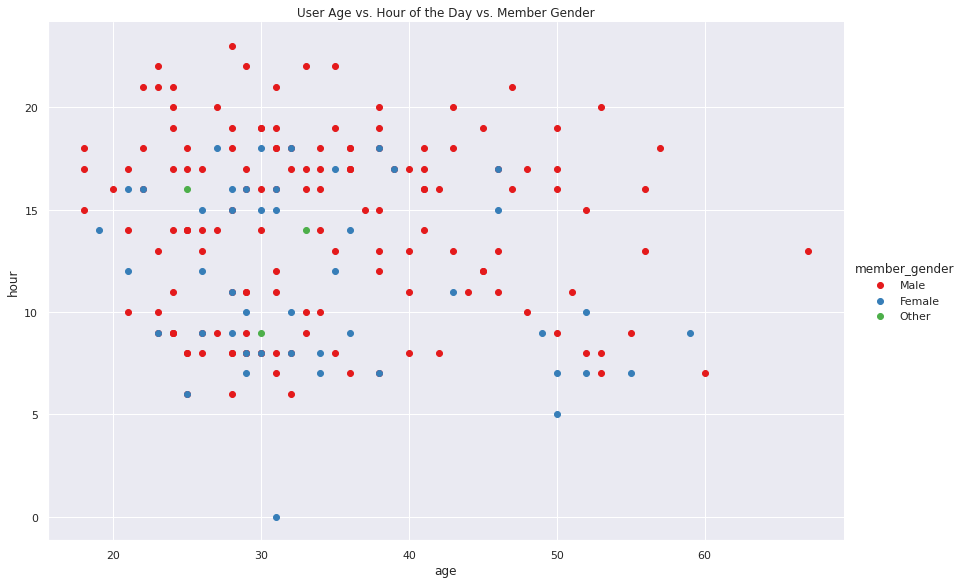

In [41]:
# Comparing User Age vs. Member Gender vs. Hour of the Day

# 200 Random samples are chosen to clear the clutter and avoid overplotting in the graph
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.reindex(sample)


g = sb.FacetGrid(data =df_subset, hue='member_gender', hue_order=['Male','Female','Other'], height =8, aspect=1.5, palette="Set1");
g.map(plt.scatter,'age','hour')
g.add_legend()
plt.title('User Age vs. Hour of the Day vs. Member Gender');

##### Observations:

1. In the random sample data, Males in the age group 25-35 have the max. number of rides after 20:00 (8 pm) hours.

##### User Age vs. Member Gender vs. Day of the Week vs. Duration in Min vs. User Type


<Figure size 720x576 with 0 Axes>

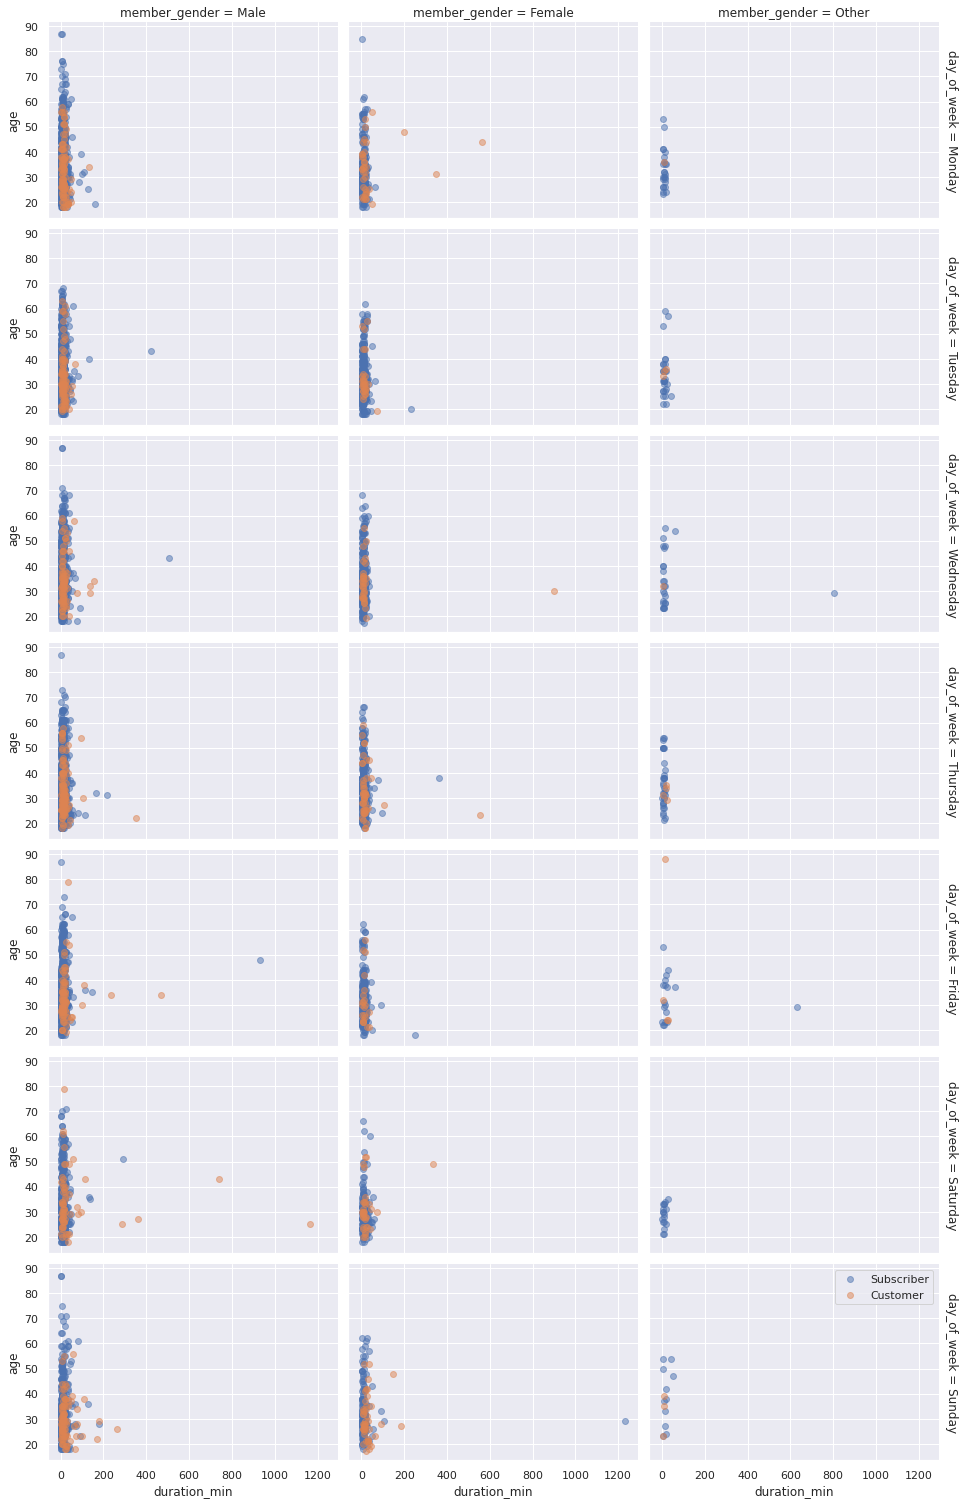

In [42]:
# 10000 Random samples are chosen to clear the clutter and avoid overplotting in the graph
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 10000, replace = False)
df_subset = df.reindex(sample)

plt.figure(figsize = [10, 8]);
g = sb.FacetGrid(data=df_subset, col = 'member_gender', row = 'day_of_week', hue='user_type', aspect=1.5, col_order = ['Male','Female','Other'], row_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], margin_titles = True);
g.map(plt.scatter, 'duration_min', 'age', alpha=0.5);
g= plt.legend();

##### Observations: 

In the random sample of 10000, we observe no relationship between user age, member gender, duration minutes, day of the week and user type.

### References

1. https://stackoverflow.com/questions/8380389/how-to-get-day-name-from-datetime (to get the day name)
2. https://matplotlib.org/stable/gallery/color/named_colors.html (names of color palettes)

## Conclusions

The following insights were observed from the explorations:

1. Weekdays appear to be more popular for bike rides compared to weekends. Around 84% of the bike rides fall in the weekdays. Thursday seems to be the most popular weekday for bike rides. 

2. 7am - 9am and  4pm-6pm seem to be the peak hours based on the no. of rides. The peak hours and more number of rides on weekdays could possibly indicate that working class is the important target customer. However, further data on user's occupation or purpose of ride is necessary to firmly conclude this statement. 

3. 90% of the bike ride users are subscribers.

4. Around 75% of the bike ride users are males.

5. 25-35 Age group contribute to the most no. of bike rides. 

6. The average duration in minutes is higher for customer user type. Also the maximum and maximum duration ride is higher for customer user type compared with subscriber user type. 

7. The average duration in minutes seem to be the same across member genders.

8. The ratio of subscribers to customers seem to be a bit high in females when compared to males.

9. The no. of rides by customers is almost steady across days of the week, whereas the no. of rides by subscribers tend to be lower in the weekends. The no. of rides drop significantly in the weekend for all genders. 

10. The distribution of age is similar across member genders and the distribution tends to be skewed to the right. 

11. Higher duration of ride is observed in the 25-45 user age group. 

12. Overall there appears to be no strong correlation between the variables that were checked in the multivariate exploration. 